In [22]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
# nltk.download('punkt')
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support as score
# from sklearn.metrics.pairwise import cosine_similarity
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [23]:
df = pd.read_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv")
df

,racism,sexism,other,none,label,tweet,category,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,0.0,1.0,0.0,0.0,2.0,s to other Halloween Hoes or else you a TRICK ...,sexism,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,2.0,the fbi has finally id d the zodiac killer wha...,sexism,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,1.0,God must have a plan for me to have someone ou...,racism,NaN,NaN,NaN,NaN
3,0.0,1.0,0.0,0.0,2.0,Fuckin that bitch from the back and hearing he...,sexism,NaN,NaN,NaN,NaN
4,0.0,1.0,0.0,0.0,2.0,bitch cunt gay slut,sexism,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10050,0.0,0.0,0.0,1.0,0.0,Check out this listing I just added to my clos...,none,NaN,NaN,NaN,NaN
10051,0.0,0.0,0.0,1.0,0.0,how are you not someone who can do it? looks l...,none,NaN,NaN,NaN,NaN
10052,0.0,0.0,0.0,1.0,0.0,i hate the schools that dont let ppl wear ripp...,none,NaN,NaN,NaN,NaN
10053,0.0,0.0,0.0,1.0,0.0,Amazon: $12 Under Armour Girls Fly by Shorts (...,none,NaN,NaN,NaN,NaN


In [24]:
df.shape

(10055, 11)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10055 entries, 0 to 10054
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   racism       10055 non-null  float64
 1   sexism       10055 non-null  float64
 2   other        10055 non-null  float64
 3   none         10055 non-null  float64
 4   label        10055 non-null  float64
 5   tweet        10055 non-null  object 
 6   category     10055 non-null  object 
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  1 non-null      object 
dtypes: float64(8), object(3)
memory usage: 864.2+ KB


In [26]:
df['racism'].fillna(0, inplace = True)
df['racism'].isnull().sum()

0

In [27]:
df['sexism'].fillna(0, inplace = True)
df['sexism'].isnull().sum()

0

In [28]:
df['other'].fillna(0, inplace = True)
df['other'].isnull().sum()

0

In [29]:
df['none'].fillna(0, inplace = True)
df['none'].isnull().sum()

0

In [30]:
df['category'].isnull().sum()

0

In [31]:
for index_label, row_series in df.iterrows():
    
    if df.at[index_label, 'none'] == 1:
        df.at[index_label, 'label'] = 0

        df.at[index_label, 'category'] = 'none' 
    
      
    elif df.at[index_label, 'racism'] == 1:
        
        df.at[index_label, 'label'] = 1        
        df.at[index_label, 'category'] = 'racism'
        
          
    elif df.at[index_label, 'sexism'] == 1:
        
        df.at[index_label, 'label'] = 2      

        df.at[index_label, 'category'] = 'sexism'
          
    elif df.at[index_label, 'other'] == 1:
        
        df.at[index_label, 'label'] = 3        

        df.at[index_label, 'category'] = 'other'
        

In [32]:
df.to_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv", index = False)
df = pd.read_csv("D:\Programming\BE PROJECT\datasets\\bullying_dataset.csv")
df

,racism,sexism,other,none,label,tweet,category,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,0.0,1.0,0.0,0.0,2.0,s to other Halloween Hoes or else you a TRICK ...,sexism,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,0.0,2.0,the fbi has finally id d the zodiac killer wha...,sexism,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,1.0,God must have a plan for me to have someone ou...,racism,NaN,NaN,NaN,NaN
3,0.0,1.0,0.0,0.0,2.0,Fuckin that bitch from the back and hearing he...,sexism,NaN,NaN,NaN,NaN
4,0.0,1.0,0.0,0.0,2.0,bitch cunt gay slut,sexism,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10050,0.0,0.0,0.0,1.0,0.0,Check out this listing I just added to my clos...,none,NaN,NaN,NaN,NaN
10051,0.0,0.0,0.0,1.0,0.0,how are you not someone who can do it? looks l...,none,NaN,NaN,NaN,NaN
10052,0.0,0.0,0.0,1.0,0.0,i hate the schools that dont let ppl wear ripp...,none,NaN,NaN,NaN,NaN
10053,0.0,0.0,0.0,1.0,0.0,Amazon: $12 Under Armour Girls Fly by Shorts (...,none,NaN,NaN,NaN,NaN


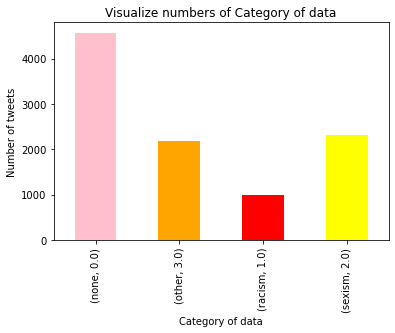

In [33]:
df.groupby('category').label.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("Category of data")
plt.ylabel('Number of tweets')
plt.title("Visualize numbers of Category of data")
plt.savefig('D:\Programming\BE PROJECT\datasets\\foo.png')
plt.show()

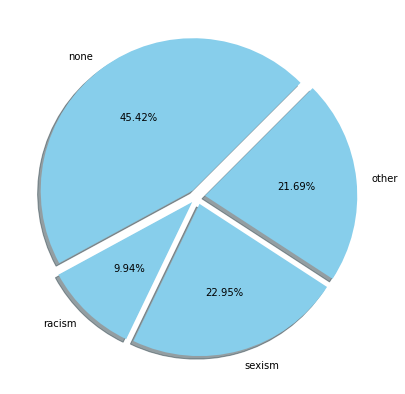

In [34]:
fig = plt.figure(figsize = (10,7))
colors = ["skyblue"]
none = df[df['label'] == 0 ]
racism = df[df['label'] == 1 ]
sexism = df[df['label'] == 2]
other = df[df['label'] == 3]
count = [none['label'].count(), racism['label'].count(), sexism['label'].count(), other['label'].count()]
pie = plt.pie(count, labels = ['none', 'racism', 'sexism', 'other'],
              autopct = "%1.2f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode= (0.05, 0.05, 0.05, 0.05)
             )

In [35]:
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

none = []
racism = []
sexism = []
other = []

for index_label, row_series in df.iterrows():
    
    if df.at[index_label, 'label'] == 0:
        
        none.append(df.at[index_label, 'tweet'])
    
      
    if df.at[index_label, 'label'] == 1:
        
        racism.append(df.at[index_label, 'tweet'])
        
          
    if df.at[index_label, 'label'] == 2:
        
        sexism.append(df.at[index_label, 'tweet'])
          
    if df.at[index_label, 'label'] == 3:
        
        other.append(df.at[index_label, 'tweet'])
        

def wordcloud_draw(dataset, category, color = 'white'):

    words = ' '.join(dataset)

    cleaned_word = ' '.join([word for word in words.split()])

    wordcloud = WordCloud(stopwords = stop,

    background_color = color,

    width = 1600, height = 800).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))

    plt.imshow(wordcloud)

    plt.axis("off")

    
    if category == 'none' :
        
        print('Non Bullying tweets: ')
    
    elif category == 'other':
        
        print('Hate speech realted tweets: ')
    
    else:
        
        print(category + " " + "related tweets : ")
    
    plt.show()



Non Bullying tweets: 


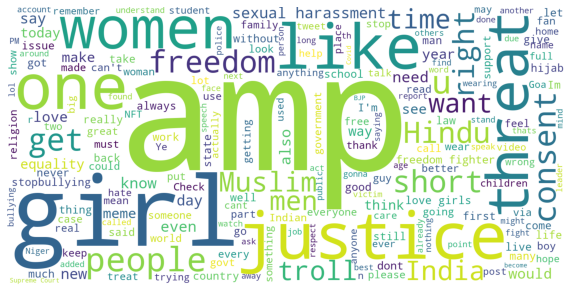

In [36]:
wordcloud_draw(none, 'none')

racism related tweets : 


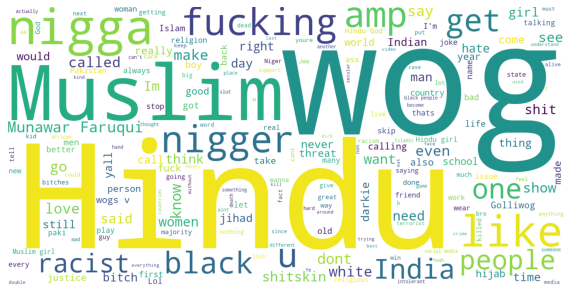

In [37]:
wordcloud_draw(racism, 'racism')

sexism related tweets : 


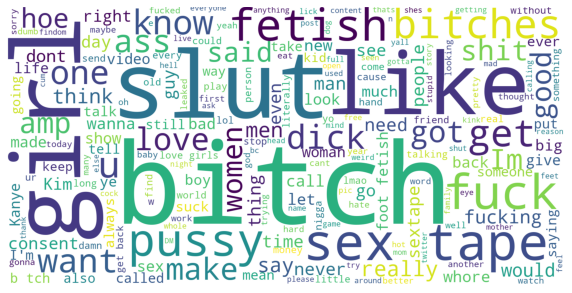

In [38]:
wordcloud_draw(sexism, 'sexism')

Hate speech realted tweets: 


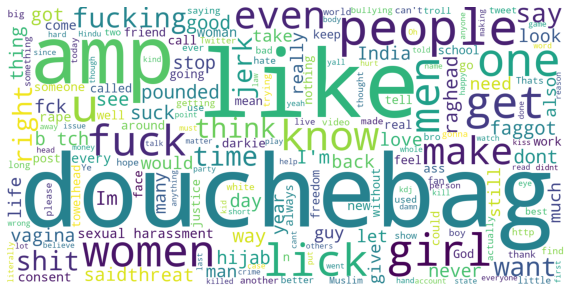

In [39]:
wordcloud_draw(other, 'other')

In [40]:
X = df['tweet']
y = df['category']
print(len(X))
print(len(y))

10055
10055


In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(max_features= 5000)
X = tfv.fit_transform(df.tweet).toarray()
y = np.array(df.category.values)

print("X.shape = ",X.shape)
print("y.shape = ",y.shape)

X.shape =  (10055, 5000)
y.shape =  (10055,)


In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle = True)
print(len(x_train))
print(len(x_test))

8044
2011


In [43]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [44]:
x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [45]:
y_train

array(['none', 'other', 'other', ..., 'other', 'none', 'none'],
      dtype=object)

In [46]:
y_test

array(['none', 'none', 'none', ..., 'sexism', 'sexism', 'sexism'],
      dtype=object)

In [47]:
#create list of model and accuracy dicts
perform_list = [ ]

In [48]:
def run_model(model_name, est_c, est_pnlty):

    mdl= ""


    if model_name == 'Random Forest':

        mdl = RandomForestClassifier(n_estimators=100 ,criterion='entropy')

    elif model_name == 'Multinomial Naive Bayes':

        mdl = MultinomialNB(alpha=1.0, fit_prior=True)
        
    


    elif model_name == 'Support Vector Classifer':

        mdl = SVC()




    elif model_name == 'Decision Tree Classifier':

        mdl = DecisionTreeClassifier()

    elif model_name == 'K Nearest Neighbour':

        mdl = KNeighborsClassifier(n_neighbors=10 , metric= 'minkowski' , p = 4)
    
    elif model_name == "Logistic Regression":
        mdl = LogisticRegression(max_iter=1000)
    
    

    oneVsRest = OneVsRestClassifier(mdl)

    oneVsRest.fit(x_train, y_train)

    y_pred = oneVsRest.predict(x_test)

    # Performance metrics

    accuracy = round(accuracy_score(y_test, y_pred) * 100, 2)

    # Get precision, recall, f1 scores

    precision, recall, f1score, support = score(y_test, y_pred, average='micro')

    print(f'Test Accuracy Score of Basic {model_name}: {accuracy} %')

    print(f'Precision : {precision}')

    print(f'Recall : {recall}')

    print(f'F1-score : {f1score}')

    # Add performance parameters to list

    perform_list.append(dict([

    ('Model', model_name),

    ('Test Accuracy', round(accuracy, 2)),

    ('Precision', round(precision, 2)),

    ('Recall', round(recall, 2)),

    ('F1', round(f1score, 2))

    ]))

In [49]:
begin = time.time()
run_model('Logistic Regression', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic Logistic Regression: 76.68 %
Precision : 0.7667826951765291
Recall : 0.7667826951765291
F1-score : 0.7667826951765291
Time taken:  8.426884412765503


In [50]:
begin = time.time()
run_model('Multinomial Naive Bayes', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic Multinomial Naive Bayes: 70.61 %
Precision : 0.7061163600198906
Recall : 0.7061163600198906
F1-score : 0.7061163600198906
Time taken:  0.6178834438323975


In [ ]:
begin = time.time()
run_model('Support Vector Classifer', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

In [182]:
begin = time.time()
run_model('K Nearest Neighbour', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

KeyboardInterrupt: 

In [31]:
begin = time.time()
run_model('Decision Tree Classifier', est_c=None, est_pnlty=None)
end = time.time()

print("Time taken: ",end - begin)

Test Accuracy Score of Basic Decision Tree Classifier: 71.84 %
Precision : 0.7183794466403162
Recall : 0.7183794466403162
F1-score : 0.7183794466403162
Time taken:  192.636403799057


In [51]:
begin = time.time()
run_model('Random Forest', est_c=None, est_pnlty=None)
end = time.time()
print("Time taken: ",end - begin)

Test Accuracy Score of Basic Random Forest: 79.86 %
Precision : 0.7986076578816509
Recall : 0.7986076578816509
F1-score : 0.7986076578816508
Time taken:  163.24015021324158


In [53]:
model_performance = pd.DataFrame(data=perform_list)
model_performance = model_performance[['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1']]
model_performance

,Model,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,76.68,0.77,0.77,0.77
1,Multinomial Naive Bayes,70.61,0.71,0.71,0.71
2,Random Forest,79.86,0.80,0.80,0.80


In [54]:
model = model_performance["Model"]
max_value = model_performance["Test Accuracy"].max()
print("The best accuracy of model is", max_value, "%")


The best accuracy of model is 79.86 %


In [55]:
classifier = RandomForestClassifier(n_estimators=100 ,criterion='entropy' ).fit(x_train, y_train)
classifier
# y_pred = classifier.predict(x_test)
# y_pred

RandomForestClassifier(criterion='entropy')

In [56]:
# save the model to disk

import joblib
vectorizer_filename= 'D:\Programming\BE PROJECT\\vectorizer.pkl'
model_filename  = 'D:\Programming\BE PROJECT\\model.pkl'

vectorizer = joblib.dump(tfv, vectorizer_filename, compress = 3) # save vectorizer
loaded_vectorizer = joblib.load(vectorizer_filename) # load vectorizer


model = joblib.dump(classifier, model_filename, compress = 3) # save model
loaded_model = joblib.load(model_filename) # load model


In [163]:
# Data fetching
#!pip3 install git+https://github.com/Museum-Barberini/twint.git@fix/RefreshTokenException#egg=twint
import nest_asyncio
nest_asyncio.apply()
import twint, time

try:

    c = twint.Config()
    
#     c.Username = input("Enter the username : ")

    c.Search = input("Enter the topic you want to search : ")

    c.Lang = "en"


#     c.Near = "India"
    
    c.Limit = 100

    c.Min_Likes = 100

    c.Store_csv = True       # store tweets in a csv file


    c.Output = "D:/Programming/BE PROJECT/test_tweets/" +c.Search + ".csv"      # path to csv file

    twint.run.Search(c)

except Exception as e:
    print(e)
  

Enter the topic you want to search : The Kashmir Files
1505933519490469890 2022-03-21 21:15:04 +0530 <VkMishr555> @Iajitdoval_ फिर फिल्म निर्माता रामगोपाल वर्मा को ही क्यों न बर्बाद कर दिया जाए। #TheKashmirFiles
1505933509814210565 2022-03-21 21:15:02 +0530 <TRULYMM8> LoL #TheKashmirFiles  https://t.co/CyRWlFSV93
1505933509432868864 2022-03-21 21:15:02 +0530 <Vijaykarnataka> The Kashmir Files: ಆ ಜನ್ಮದಿನ ನನ್ನ ಮಾವನ ಪ್ರಾಣ ಉಳಿಸಿತು! 3 ದಶಕಗಳ ಹಿಂದಿನ ಭೀಕರ ಕ್ರೌರ್ಯ ಬಿಚ್ಚಿಟ್ಟ ವೈದ್ಯ    #thekashmirfiles   https://t.co/blI8hPKPEW
1505933507251515393 2022-03-21 21:15:01 +0530 <loknathpandey74> आमिर ख़ान ने की #TheKashmirFiles देखने की अपील, मगर फिर भी हम "लाल सिंह चड्ढा" नहीं देखेंगे! #बॉयकॉट_जिहादी_गैंग
1505933503904448513 2022-03-21 21:15:00 +0530 <ErenJaeger112> @KashmirFiles  https://t.co/yCuEPTdY8z Get ready for filming next genocide. They are getting ready to perpetrate the next hindu genocide
1505933501945704449 2022-03-21 21:15:00 +0530 <I_am_Navya_> Watch the movie.. forgive but never forget

In [164]:
# Data import
import pandas as pd

df1 = pd.read_csv( "D:/Programming/BE PROJECT/test_tweets/" + c.Search + ".csv", error_bad_lines= False)

print(len(df1['tweet']))

df1['tweet']


100


0     @Iajitdoval_ फिर फिल्म निर्माता रामगोपाल वर्मा...
1         LoL #TheKashmirFiles  https://t.co/CyRWlFSV93
2     The Kashmir Files: ಆ ಜನ್ಮದಿನ ನನ್ನ ಮಾವನ ಪ್ರಾಣ ಉ...
3     आमिर ख़ान ने की #TheKashmirFiles देखने की अपील...
4     @KashmirFiles  https://t.co/yCuEPTdY8z Get rea...
                            ...                        
95    “द कश्मीर फाइल”फ़िल्म को राष्ट्रहित मैं दूरदर्...
96    @kmadathil Nice summary ...I see it  covering ...
97    अगर हिन्दुओ जाग चूका होता तो आज #TheKashmirFil...
98    Yesterday I Watched Kashmir files.Painful trut...
99    Release of the film - Kashmir Files in NZ - Si...
Name: tweet, Length: 100, dtype: object

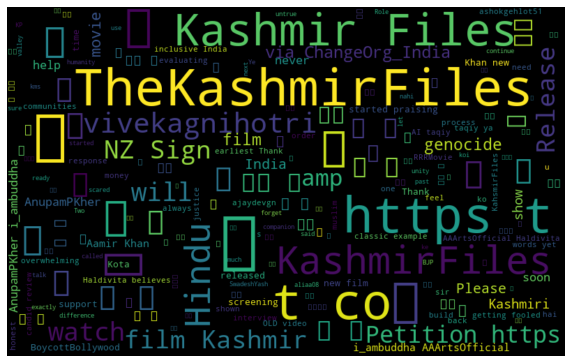

In [165]:
# world cloud to see frequent words in tweets.

all_words = ' '.join([text for text in df1['tweet']])

from wordcloud import WordCloud

import matplotlib.pyplot as plt 

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)


plt.figure(figsize=(10, 7))

plt.imshow(wordcloud, interpolation="bilinear")

plt.axis('off')

plt.show()


In [166]:
# preprocessing and removing  non english tweets

import preprocessor as p

from langdetect import detect 

def preprocess(input_txt):
    
    try:
        if detect(input_txt) == 'en':
            pattern = "[^@[\w]+]| [a-zA-Z]+"
            result = ''.join(re.findall(pattern, input_txt))
            return result

    except Exception as e:
        print(e)

In [167]:
# clean the tweets and remove non-english tweets

df1['tweet'] = np.vectorize(preprocess)(df1['tweet'].astype(str))

In [168]:
print(df1['tweet'].head())
df1['tweet'].replace('None', np.nan, inplace=True)
print("\nLength before deleting: ", len(df1))
df1.dropna(subset=['tweet'], how ='all', inplace = True)
df1 = df1.reset_index()
print("Length after deleting: ", len(df1))
print("Empty values: ", df1.tweet.isnull().sum())


0                                                 None
1                                                https
2                                                 None
3                                                 None
4     https Get ready for filming next genocide The...
Name: tweet, dtype: object

Length before deleting:  100
Length after deleting:  70
Empty values:  0


In [169]:
df1['tweet'].head()

0                                                https
1     https Get ready for filming next genocide The...
2     the movie forgive but never forget what happe...
3     believes this is the time to build an honest ...
4       Hindus educate yourselves about movement https
Name: tweet, dtype: object

In [170]:
lemmatizer = WordNetLemmatizer()

In [171]:
tweets = []
for i in df1['tweet']:
    tweets.append(i)
tweets

[' https',
 ' https Get ready for filming next genocide They are getting ready to perpetrate the next hindu genocide',
 ' the movie forgive but never forget what happened with KP in the valley there is no point being jingoistic about the past and target innocents in the name of Revenge There won be a difference then',
 ' believes this is the time to build an honest and inclusive India Thank you for your candid review on The response has been overwhelming We are in the process of evaluating the same and we will get back to you at the earliest Thank you again',
 ' Hindus educate yourselves about movement https',
 ' of the film Kashmir Files in NZ Sign the Petition https via',
 ' of the film Kashmir Files in NZ Sign the Petition https via',
 ' I don argue with fools let alone abuse You may continue your argument Since you are talking about humanity did you watch',
 ' Khan new film will be released very soon That why he has started praising The Kashmir Files',
 ' the efforts they are putti

In [172]:
corpus = []
for i in range(len(tweets)):
    tweet = re.sub('[^a-zA-Z]', ' ', tweets[i])
    tweet = tweet.lower()
    tweet = tweet.split()
    tweet = [lemmatizer.lemmatize(word) for word in tweet if word not in stopwords.words('english')]
    tweet = " ".join(tweet)
    corpus.append(tweet)

for i in corpus:
    print(i)

http
http get ready filming next genocide getting ready perpetrate next hindu genocide
movie forgive never forget happened kp valley point jingoistic past target innocent name revenge difference
belief time build honest inclusive india thank candid review response overwhelming process evaluating get back earliest thank
hindu educate movement http
film kashmir file nz sign petition http via
film kashmir file nz sign petition http via
argue fool let alone abuse may continue argument since talking humanity watch
khan new film released soon started praising kashmir file
effort putting discredit show rattled talk specific exactly untrue interview mention exactly untrue let answer much journalist
young kid kota travel many km watch movie
courtesy kashmir file
forget brother rajamouli sir film think need tell magic ntr rc
patriotism scared hindu unity scared bankruptcy
gratitude http
canceling review remains film companion agenda companion
buddha traffic jam vivek agnihotri used india comedia

In [173]:
y_pred1 = tfv.transform(corpus)

prediction = classifier.predict(y_pred1)


for i in range(len(prediction)):
    print("\n" + '['  + str(i+1) + ']'  + "  "  + df1['tweet'][i] + "  "  + '[' + prediction[i] + ']')
   




[1]   https  [none]

[2]   https Get ready for filming next genocide They are getting ready to perpetrate the next hindu genocide  [none]

[3]   the movie forgive but never forget what happened with KP in the valley there is no point being jingoistic about the past and target innocents in the name of Revenge There won be a difference then  [none]

[4]   believes this is the time to build an honest and inclusive India Thank you for your candid review on The response has been overwhelming We are in the process of evaluating the same and we will get back to you at the earliest Thank you again  [none]

[5]   Hindus educate yourselves about movement https  [none]

[6]   of the film Kashmir Files in NZ Sign the Petition https via  [none]

[7]   of the film Kashmir Files in NZ Sign the Petition https via  [none]

[8]   I don argue with fools let alone abuse You may continue your argument Since you are talking about humanity did you watch  [none]

[9]   Khan new film will be released very soo

In [174]:
# import necessary libraries 
import easyocr
import joblib


In [175]:
def imgtotext(links):
    
    
    reader = easyocr.Reader(['en'], gpu = False)
    
    for link in links:
        
        result = reader.readtext(link, paragraph='False', detail  = 0)
    
    corpus = []
    
    for i in range(len(result)):
        tweet = re.sub('[^a-zA-Z]', ' ', result[i])
        tweet = tweet.lower()
        tweet = tweet.split()
        tweet = [lemmatizer.lemmatize(word) for word in tweet if word not in stopwords.words('english')]
        tweet = " ".join(tweet)
        corpus.append(tweet)

    text  = " "
    text = text.join(corpus)
    
    
    vectorizer_filename= 'D:\Programming\BE PROJECT\\vectorizer.pkl'
    model_filename  = 'D:\Programming\BE PROJECT\\model.pkl'
    
    loaded_vectorizer = joblib.load(vectorizer_filename) # load vectorizer
    loaded_model = joblib.load(model_filename) # load model

    text_transformed = loaded_vectorizer.transform([text])

    print(text)
    return loaded_model.predict(text_transformed)




    

In [176]:
for i in range(len(df1)):
    
    if len(df1['photos'][i]) > 2:
        text = df1['photos'][i]
        pattern = "https:[^']+"
        links = re.findall(pattern, text)

        print(imgtotext(links))

KeyboardInterrupt: 

In [179]:
j = 0
for i in range(len(df1)):
    hashtags = ""
    if len(df1['hashtags'][i]) > 2:
        text = df1['hashtags'][i]
        pattern = "\w+"
        hashtags = " ".join(re.findall(pattern, text))
        print("\nTweet: ", df1['tweet'][i])
        text_transformed = loaded_vectorizer.transform([hashtags])
        print("\nHashtags: ", df1['hashtags'][i])
        print("\nPrediction: ", loaded_model.predict(text_transformed))



        


Tweet:   https

Hashtags:  ['thekashmirfiles']
<class 'numpy.ndarray'>

Tweet:   the movie forgive but never forget what happened with KP in the valley there is no point being jingoistic about the past and target innocents in the name of Revenge There won be a difference then

Hashtags:  ['kashmirfiles']
<class 'numpy.ndarray'>

Tweet:   believes this is the time to build an honest and inclusive India Thank you for your candid review on The response has been overwhelming We are in the process of evaluating the same and we will get back to you at the earliest Thank you again

Hashtags:  ['haldivita']
<class 'numpy.ndarray'>

Tweet:   Hindus educate yourselves about movement https

Hashtags:  ['bjp', 'rss', 'kashmirfiles', 'thekashmirfiles']
<class 'numpy.ndarray'>

Tweet:   I don argue with fools let alone abuse You may continue your argument Since you are talking about humanity did you watch

Hashtags:  ['thekashmirfiles']
<class 'numpy.ndarray'>

Tweet:   the efforts they are putting